In [86]:
import os
import sys
import importlib
import matplotlib.pyplot as plt
if '../utils' not in sys.path:
    sys.path.insert(0,'../utils')
import lmp
import lmpsetup
import analysis
import plotter
import numpy as np
import mdtraj as md

importlib.reload(lmp);
importlib.reload(lmpsetup);
importlib.reload(analysis);
importlib.reload(plotter);

In [3]:
an = analysis.Analysis(oliba_wd='/home/adria/data/prod/TRASH/CPEB4x50', temper=True)

[  20.    22.5   25.    30.    32.5   40.    42.5   47.5   57.5   62.5
   70.  -450. ]
[ 1154.65557714  4186.47532536  7507.22937536 11295.20741821
 15584.99968786 20926.150641   26379.4297325  32144.36312
 38143.6555075  44233.21104679 51082.31098964 -1592.31462643]
[-1592.31462643  1154.65557714  4186.47532536  7507.22937536
 11295.20741821 15584.99968786 20926.150641   26379.4297325
 32144.36312    38143.6555075  44233.21104679 51082.31098964]
[137.34851018 134.74754437 132.830162   126.26593476 131.9936083
 133.52877383 128.31244921 121.36701868 104.33551978  97.43288863
  97.8442849  117.05472359]


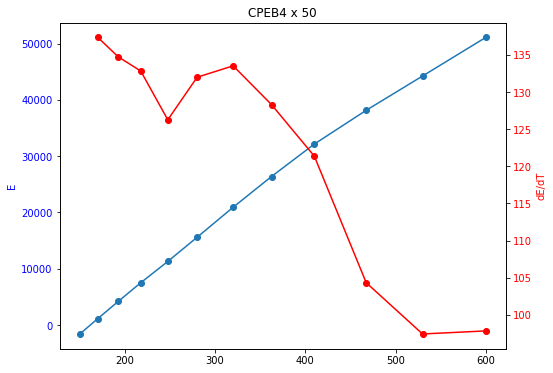

In [76]:
Ts = np.array([150.0, 170.0, 192.5, 217.5, 247.5, 280.0, 320.0, 362.5, 410.0, 467.5, 530.0, 600.0])
dT = (np.roll(Ts,-1) - Ts)
print(dT)

data = an.get_lmp_temper_data()
kin_E = data[:,:,2]
pot_E = data[:,:,1]
E = kin_E + pot_E
E = E.mean(axis=1)
dE = np.divide((np.roll(E,-1) - E),dT)


print(np.roll(E,-1))

print(E)

print(dE)

fig, ax1 = plt.subplots(figsize=(8,6))
plt.title("CPEB4 x 50")
ax1.set_ylabel("E", color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.plot([150.0, 170.0, 192.5, 217.5, 247.5, 280.0, 320.0, 362.5, 410.0, 467.5, 530.0, 600.0], E, '-o')

ax2 = ax1.twinx()
ax2.set_ylabel("dE/dT", color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.plot([170.0, 192.5, 217.5, 247.5, 280.0, 320.0, 362.5, 410.0, 467.5, 530.0, 600.0], dE[:-1], 'r-o')

(12, 56, 5)


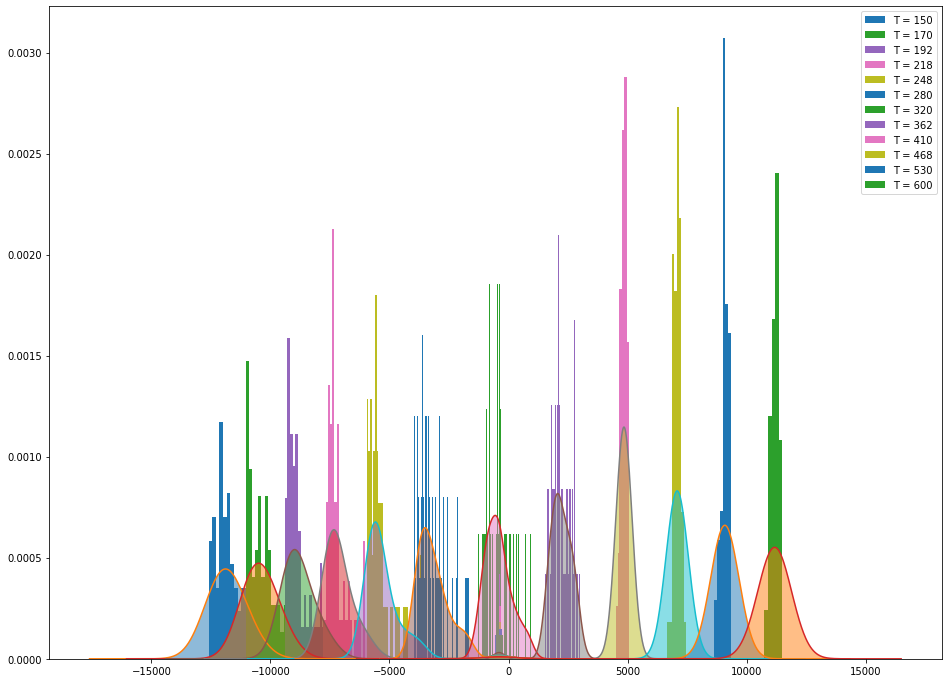

In [172]:
importlib.reload(lmp);
importlib.reload(lmpsetup);
importlib.reload(analysis);
importlib.reload(plotter);

plott = plotter.Plotter(oliba_wd='/home/adria/data/prod/TRASH/CPEB4x50', temper=True)
plott.plot_E_ensemble()

In [234]:
importlib.reload(lmp);
importlib.reload(lmpsetup);
importlib.reload(analysis);
importlib.reload(plotter);

A = '/home/adria/test/rerun/run/12D'
B = '/home/adria/test/rerun/run/WT'
mini = analysis.Analysis(oliba_wd='.')
mini.minimize_I_ls(A,B, protein_a="CPEB4", protein_b="12D_CPEB4")

Run Completed at inf %
Run Completed at inf %
1.38064852e-23
Run Completed at inf %
Run Completed at inf %
Run Completed at inf %
[[1.00000000e+00 2.17525169e-02 2.93426920e-14 1.71314152e-19
  5.81139007e+21 7.97532255e+06 1.52573741e-03 6.51936850e-12
  4.03549250e+24 6.54587873e+07 1.70959183e+16]]
Run Completed at inf %
Run Completed at inf %
Run Completed at inf %
[[1.00000000e+00 9.39526026e-02 1.17617842e-12 2.50156813e-19
  2.78090412e+19 1.07226678e+08 8.58841469e-02 2.52645079e-07
  1.71104945e+11 4.65803755e+00 6.51221036e+22]]


In [277]:
np.set_printoptions(threshold=sys.maxsize)

sett = lmpsetup.LMPSetup(oliba_wd='.', protein='CPEB4')
sett.get_pdb_xyz(pdb='../data/equil/CPEB4.pdb')
print(sett.xyz[0])
np.savetxt('test.xyz',sett.xyz[0])

Directory does not exist. Creating dir : ./1.0ls-100I-80e
[[ 1.04550171e+01 -2.48057175e+01  4.45167542e+00]
 [ 1.33750153e+01 -2.24057198e+01  4.08166885e+00]
 [ 1.51950073e+01 -1.93357277e+01  2.72167206e+00]
 [ 1.46150208e+01 -1.89757156e+01 -1.04831696e+00]
 [ 1.13050079e+01 -2.09957314e+01  1.01680756e-01]
 [ 9.78500366e+00 -2.37457275e+01 -2.64831543e+00]
 [ 6.74499512e+00 -2.39657211e+01 -4.15832520e+00]
 [ 4.56501007e+00 -2.16657257e+01 -5.96832275e+00]
 [ 1.75502777e+00 -2.18557167e+01 -8.87832642e+00]
 [ 6.25000000e-01 -2.53757286e+01 -8.61831665e+00]
 [ 2.88501740e+00 -2.82757187e+01 -7.39831924e+00]
 [ 6.45027161e-01 -3.11957169e+01 -6.87831879e+00]
 [ 1.29501343e+00 -3.27657318e+01 -3.39832306e+00]
 [ 9.25025940e-01 -2.90357208e+01 -1.75832748e+00]
 [ 1.27502441e+00 -2.82757187e+01  1.92167282e+00]
 [-5.64994812e-01 -2.75357246e+01  5.03168106e+00]
 [ 7.05032349e-01 -2.43757248e+01  6.94168091e+00]
 [ 2.99499512e+00 -2.11757278e+01  5.55168152e+00]
 [ 2.88501740e+00 -2.043

In [286]:
importlib.reload(lmp);
importlib.reload(lmpsetup);
importlib.reload(analysis);
importlib.reload(plotter);

d = '/home/adria/test/pdb'
protein = 'CPEB4'
small_set = lmpsetup.LMPSetup(oliba_wd=d, protein=protein, chains=50, temper=True)
small_set.get_pdb_xyz(pdb='/home/adria/scripts/lammps/data/equil/CPEB4.pdb', padding=15)
small_set._generate_pdb(charged_color=True)

import mdtraj as md
md.load('/home/adria/test/pdb/1.0ls-100I-80e/atom_traj_0.lammpstrj', top='/home/adria/test/pdb/1.0ls-100I-80e/topo.pdb')

<mdtraj.Trajectory with 1 frames, 22400 atoms, 22400 residues, and unitcells at 0x7f78cc931dd0>

In [294]:
tr = md.load('/home/adria/perdiux/prod/lammps/dignon/CPEB4_D4/1.0ls-100I-80e/dcd_traj_4.dcd', top='/home/adria/perdiux/prod/lammps/dignon/12D_CPEB4_D4/1.0ls-100I-80e/data_trj.pdb')

In [295]:
tr[-1].save_pdb('/home/adria/scripts/lammps/data/equil/CPEB4_D4.pdb')

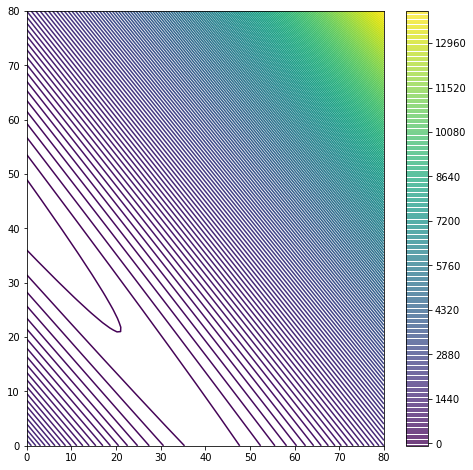

In [391]:
plt.figure(figsize=(8,8))
X = np.linspace(0,80,100)
Y = np.linspace(0,80,100)
X,Y = np.meshgrid(X, Y)
Z = X - Y + (Y - 21 + X - 21)**2
# Z = Y-X + 1*(X + Y - 80)**2
cunt = plt.contour(X, Y, Z, levels=200)
plt.colorbar(cunt)

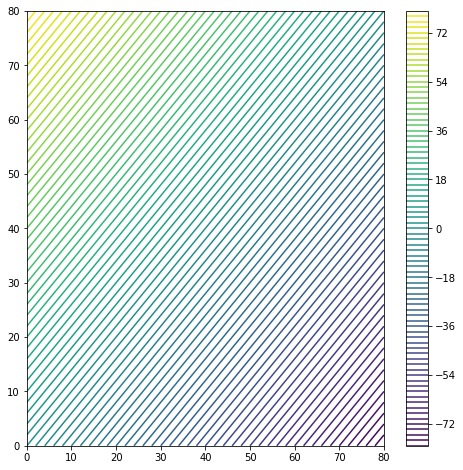

In [378]:
plt.figure(figsize=(8,8))
X = np.linspace(0,80,100)
Y = np.linspace(0,80,100)
X,Y = np.meshgrid(X, Y)
Z = -1*(X-Y) 
cunt = plt.contour(X, Y, Z, levels=100)
plt.colorbar(cunt)

In [397]:
md.compute_rg(md.load('/home/adria/test/rerun/12D4/dcd_traj_0.dcd', top='/home/adria/test/rerun/12D4/data_trj.pdb')).mean()

22.388284872982222